<a href="https://colab.research.google.com/github/rathodbhumi/rathodbhumi/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_datareader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import pandas_datareader as pdr
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv('/content/StockMarket.csv')

In [ ]:
df.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0.0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0.0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0.0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0.0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0.0


In [ ]:
df.tail()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
2983,2022-11-18,10.5,12.0,10.5,12.0,12.0,7043,ASTC,48.309005,48.831912,...,13.5,58.333338,36.111121,58.333338,36.111121,22.222216,1.057508,-2.400000,-16.666664,0.0
2984,2022-11-21,12.0,12.0,10.8,11.1,11.1,4363,ASTC,42.348950,47.955384,...,13.5,33.333351,38.888901,33.333351,38.888901,-5.555550,0.655105,-0.900001,-7.500004,0.0
2985,2022-11-22,11.1,12.3,10.5,10.8,10.8,18423,ASTC,40.561717,52.725236,...,13.5,25.000013,38.888901,25.000013,38.888901,-13.888887,2.766216,-0.600000,-5.263161,0.0
2986,2022-11-23,10.5,10.5,9.6,10.2,10.2,33920,ASTC,37.197776,57.342166,...,13.5,15.384602,24.572655,15.384602,24.572655,-9.188053,5.093093,-0.300000,-2.857145,0.0
2987,2022-11-25,11.1,11.1,10.2,10.2,10.2,11940,ASTC,37.197776,49.931729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info

<bound method DataFrame.info of             date       open       high        low      close   adjclose  \
0     2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000   
1     2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000   
2     2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001   
3     2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000   
4     2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000   
...          ...        ...        ...        ...        ...        ...   
2983  2022-11-18  10.500000  12.000000  10.500000  12.000000  12.000000   
2984  2022-11-21  12.000000  12.000000  10.800000  11.100000  11.100000   
2985  2022-11-22  11.100000  12.300000  10.500000  10.800000  10.800000   
2986  2022-11-23  10.500000  10.500000   9.600000  10.200000  10.200000   
2987  2022-11-25  11.100000  11.100000  10.200000  10.200000  10.200000   

      volume ticker  RSIadjclose15  RSIvolume15  ...  high-15      

In [ ]:
df.isnull().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    284
volumenrelativo     216
diff                 56
INCREMENTO           56
TARGET                1
Length: 1285, dtype: int64

In [ ]:
df.columns


Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'RSIadjclose15', 'RSIvolume15',
       ...
       'high-15', 'K-15', 'D-15', 'stochastic-k-15', 'stochastic-d-15',
       'stochastic-kd-15', 'volumenrelativo', 'diff', 'INCREMENTO', 'TARGET'],
      dtype='object', length=1285)

In [ ]:
data = pd.DataFrame({'Close': [1, 2, 3, 4, 5]})
data['Target'] = data['Close'].shift(-1)
print(data)

   Close  Target
0      1     2.0
1      2     3.0
2      3     4.0
3      4     5.0
4      5     NaN


In [ ]:
data.dropna(inplace=True)
print(data)

   Close  Target
0      1     2.0
1      2     3.0
2      3     4.0
3      4     5.0


In [ ]:
if 'Date' in data.columns:
    X = data.drop(['Target', 'Date'], axis=1)  # Drop 'Date' if present
else:
    X = data.drop(['Target'], axis=1)  # Drop only 'Target' if 'Date' is absent
    print(data)

   Close  Target
0      1     2.0
1      2     3.0
2      3     4.0
3      4     5.0


In [ ]:
# Load X and y from a file
import numpy as np
from sklearn.model_selection import train_test_split

# Create X and y from scratch
X = np.random.rand(100, 10)
y = np.random.randint(0, 2, size=100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(data)

<module 'pandas_datareader' from '/usr/local/lib/python3.10/dist-packages/pandas_datareader/__init__.py'>


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print(data)

<module 'pandas_datareader' from '/usr/local/lib/python3.10/dist-packages/pandas_datareader/__init__.py'>


In [ ]:
predictions = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.284325


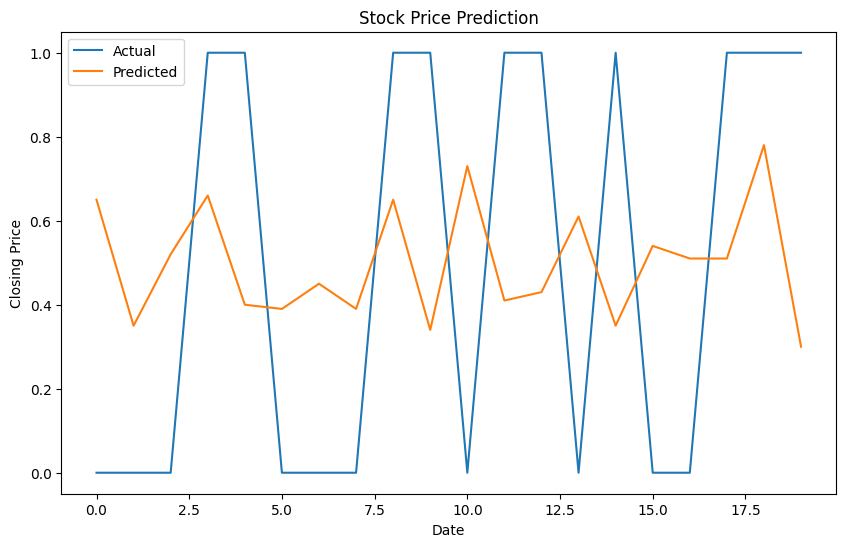

In [ ]:
plt.figure(figsize=(10, 6))
y_test = pd.DataFrame(y_test, columns=['Close'])
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()